Machine Learning for Social Science 
Assignment 2 

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import statistics

## Part 1: Regression on California Test Scores

1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).




In [2]:
#Read csv file
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv", encoding="latin_1")

df.head(10) # read the first 10 rows to check the data 

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

The three vairables I would like to investigate are expnstu(Expenditure per student), avginc(District average income in USD 1,000) and elpct(Percent of English learners). 

The dependent variable is testscr(test score).

Text(0, 0.5, 'Count')

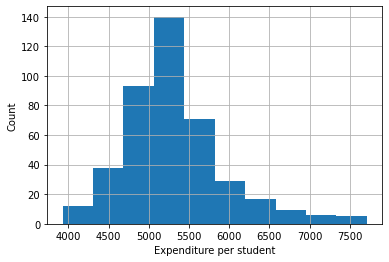

In [3]:
from matplotlib import pyplot as plt 
df ['expnstu'].hist()
plt.xlabel('Expenditure per student')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

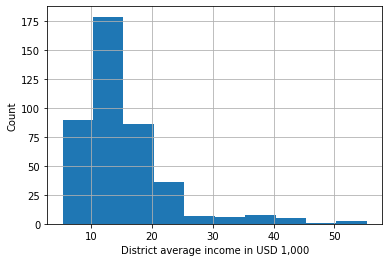

In [4]:
df ['avginc'].hist()
plt.xlabel('District average income in USD 1,000')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

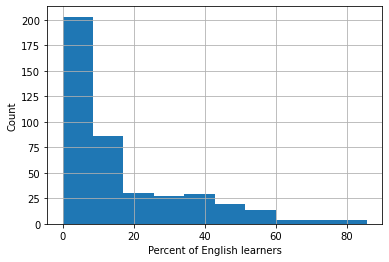

In [5]:
df ['elpct'].hist()
plt.xlabel('Percent of English learners')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

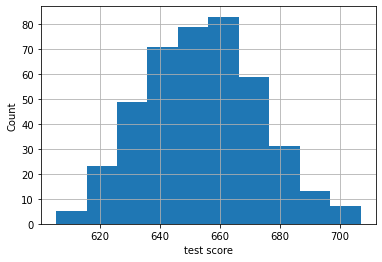

In [6]:
df ['testscr'].hist()
plt.xlabel('test score')
plt.ylabel('Count')

1.2 Visualize the dependency of the target on each feature from 1.1.

If we only consider two variable in each case. Expenditure per student and District average income in USD 1,000 have a positive influence on test score. However, Percent of English learners tend to negatively influence test score.

Text(0, 0.5, 'Test Score')

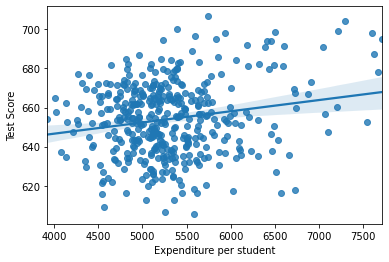

In [7]:
reg1 = sns.regplot(x=df ['expnstu'], y= df ['testscr'])
plt.xlabel('Expenditure per student')
plt.ylabel('Test Score')

Text(0, 0.5, 'Test Score')

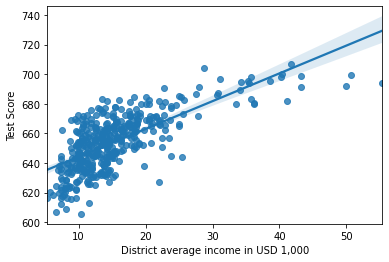

In [8]:
reg2 = sns.regplot(x=df ['avginc'], y= df ['testscr'])
plt.xlabel('District average income in USD 1,000')
plt.ylabel('Test Score')

Text(0, 0.5, 'Test Score')

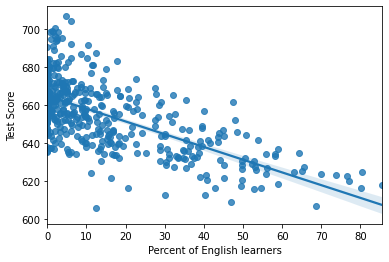

In [9]:
reg3 = sns.regplot(x=df ['elpct'], y= df ['testscr'])
plt.xlabel('Percent of English learners')
plt.ylabel('Test Score')

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?


In [10]:
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


I choose to leave out the identity variables (such as name and district code) which are not related to the test score and the number of computer variable(since I have the computer per student variable in X).

In [11]:
y = df['testscr']  
X = pd.DataFrame(df, columns = ['enrltot', 'teachers', 'calwpct', 'mealpct', 
                              'compstu', 'expnstu', 'str', 'avginc', 'elpct' ])


y.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64

In [12]:
X.head(10)

,enrltot,teachers,calwpct,mealpct,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,0.128090,5235.987793,18.671329,9.080333,13.857677
5,137,6.400000,12.318800,86.956497,0.182482,5580.146973,21.406250,10.415000,12.408759
6,195,10.000000,12.903200,94.623703,0.143590,5253.331055,19.500000,6.577000,68.717949
7,888,42.500000,18.806299,100.000000,0.074324,4565.746094,20.894117,8.174000,46.959461
8,379,19.000000,32.189999,93.139801,0.092348,5355.548340,19.947369,7.385000,30.079157
9,2247,108.000000,78.994202,87.316399,0.000000,5036.211426,20.805555,11.613333,40.275921


In [13]:
# Split data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [15]:
# KNN regression 
from sklearn.neighbors import KNeighborsRegressor

CV_score_KNN = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kfold).mean()

print("KNN regression KFold CV Score :\n{}".format(CV_score_KNN))


KNN regression KFold CV Score :
-0.045504977160864546


In [16]:
# Linear Regression (OLS)
from sklearn.linear_model import LinearRegression

CV_score_ols = cross_val_score(LinearRegression(), X_train, y_train, cv=kfold).mean()

print("OLS KFold CV Score :\n{}".format(CV_score_ols))

OLS KFold CV Score :
0.7742958024121624


In [17]:
# Ridge 
from sklearn.linear_model import Ridge
CV_score_r = cross_val_score(Ridge(), X_train, y_train, cv=kfold).mean()

print("Ridge KFold CV Score :\n{}".format(CV_score_r))

Ridge KFold CV Score :
0.7750890746021996


In [18]:
# Lasso
from sklearn.linear_model import Lasso


CV_score_lasso = cross_val_score(Lasso(max_iter=100000), X_train, y_train, cv=kfold).mean()

print("Lasso KFold CV Score :\n{}".format(CV_score_lasso))

Lasso KFold CV Score :
0.7752635356753672


The purpose of cross validation is to measure model's ability for prediction. So we can hopefully avoid some flag problems, such as overfitting. The cross validation score is our criteria to choose models. Therefore, in this case, lasso is our best model, Ridge is the second best, OLS is the third, and KNN regressor is the worst model. 

* This part is based on my personal understanding of lecture notes and cross-validation wikipedia webpage. 

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# KNN regression on Scaled X
CV_score_KNN2 = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=kfold).mean()
print("After scaling X, KNN KFold CV Score :\n{}".format(CV_score_KNN2))


After scaling X, KNN KFold CV Score :
0.6969971411741339


In [22]:
# Linear Regression (OLS) on Scaled X

CV_score_ols2 = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold).mean()
print("After scaling X, OLS KFold CV Score :\n{}".format(CV_score_ols2))


After scaling X, OLS KFold CV Score :
0.7742958024121618


In [23]:
# Ridge on Scaled X 
CV_score_r2 = cross_val_score(Ridge(), X_train_scaled, y_train, cv=kfold).mean()
print("After scaling X, Ridge KFold CV Score :\n{}".format(CV_score_r2))


After scaling X, Ridge KFold CV Score :
0.7755485372561793


In [24]:
# Lasso on Scaled X
CV_score_lasso2 = cross_val_score(Lasso(), X_train_scaled, y_train, cv=kfold).mean()
print("After scaling X, Lasso KFold CV Score :\n{}".format(CV_score_lasso2))



After scaling X, Lasso KFold CV Score :
0.7712908413573525


Based on test set score, the StandardScaler significantly improve the cv score of KNN regressor, slightly improve the results of ridge and lasso but does not significantly change the score of ols. 

1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# KNN Grid Search
param_grid_KNN = {'n_neighbors': np.arange(1, 25, 2)} 

grid_KNN = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_KNN) 

grid_KNN.fit(X_train, y_train) 

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_KNN.best_score_))
print("best parameters: {}".format(grid_KNN.best_params_))
print("test-set score: {:.3f}".format(grid_KNN.score(X_test, y_test))) 


best mean cross-validation score: 0.006
best parameters: {'n_neighbors': 17}
test-set score: 0.112


In [27]:
# Ridge Grid Search
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge) 

grid_ridge.fit(X_train, y_train) 

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_ridge.best_score_))
print("best parameters: {}".format(grid_ridge.best_params_))
print("test-set score: {:.3f}".format(grid_ridge.score(X_test, y_test))) 
results_ridge = pd.DataFrame(grid_ridge.cv_results_)
results_ridge

best mean cross-validation score: 0.776
best parameters: {'alpha': 1000}
test-set score: 0.850


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003477,0.000548,0.002475,0.000543,0.001,{'alpha': 0.001},0.828430,0.704247,0.801145,0.807046,0.730622,0.774298,0.048038,7
1,0.002381,0.000578,0.001787,0.000399,0.01,{'alpha': 0.01},0.828444,0.704266,0.801143,0.807023,0.730718,0.774319,0.048015,6
2,0.003674,0.000746,0.002182,0.000506,0.1,{'alpha': 0.1},0.828560,0.704420,0.801125,0.806806,0.731568,0.774496,0.047811,5
3,0.003776,0.000507,0.002672,0.000393,1,{'alpha': 1},0.828887,0.704806,0.800831,0.805702,0.735219,0.775089,0.046954,4
4,0.003671,0.000673,0.002381,0.000371,10,{'alpha': 10},0.828777,0.704689,0.800286,0.804591,0.737874,0.775243,0.046322,3
5,0.003373,0.000578,0.002480,0.000444,100,{'alpha': 100},0.828548,0.705236,0.800501,0.804445,0.738279,0.775402,0.046042,2
6,0.004068,0.000198,0.002579,0.000370,1000,{'alpha': 1000},0.827331,0.706448,0.803143,0.805153,0.737558,0.775926,0.045906,1


In [28]:
# Lasso Grid Search
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

grid_lasso = GridSearchCV(Lasso(max_iter=100000), param_grid=param_grid_lasso) 

grid_lasso.fit(X_train, y_train) 

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_lasso.best_score_))
print("best parameters: {}".format(grid_lasso.best_params_))
print("test-set score: {:.3f}".format(grid_lasso.score(X_test, y_test))) 
results_ridge = pd.DataFrame(grid_lasso.cv_results_)


best mean cross-validation score: 0.775
best parameters: {'alpha': 1}
test-set score: 0.851


The application of GridSearchCV slightly improve the cv scores.

1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

The two best models are ridge with alpha = 1000 and lasso with alpha = 1. 
No, compared to Ridge, lasso uses L1 penalty, which can force some coefficients to be zero. Therefore, we have 7 coefficients in lasso and 9 in ridge. Among the common coefficients the two models have, they both assigns the largest absolute coefficient value to avginc, and the second largest to mealpct.

In [29]:
X_train.head()

,enrltot,teachers,calwpct,mealpct,compstu,expnstu,str,avginc,elpct
192,6201,339.100006,7.179600,47.702499,0.102242,5215.943848,18.286640,19.589636,47.879375
69,1154,62.099998,22.927700,84.920601,0.111785,6056.497070,18.582932,11.665000,55.892544
287,2231,114.300003,2.916100,13.369200,0.115643,5599.607910,19.518810,16.955999,13.626176
136,104,5.000000,32.381001,49.523800,0.182692,5594.196289,20.799999,9.972000,13.461539
114,239,12.200000,15.611800,69.620300,0.125523,4441.672852,19.590164,14.066000,8.786611


In [30]:
grid_ridge.best_params_


{'alpha': 1000}

In [31]:
grid_lasso.best_params_

{'alpha': 1}

In [32]:
ridge_best = Ridge(alpha= 1000)
ridge_best.fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(ridge_best.coef_ != 0)))
ridge_best.coef_

Number of features used: 9


array([-0.0018328 ,  0.0389024 , -0.1096461 , -0.38629872,  0.01270623,
        0.00213543, -0.09134638,  0.49761015, -0.20084118])

In [33]:
lasso_best = Lasso(alpha= 1, max_iter=100000)
lasso_best.fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso_best.coef_ != 0)))
lasso_best.coef_

Number of features used: 7


array([-0.00161779,  0.03378895, -0.0891825 , -0.38975071,  0.        ,
        0.00217126, -0.        ,  0.5261505 , -0.19723764])

1.6 Discuss which final model you would choose to predict new data

In [34]:
CV_score_rbest = cross_val_score(ridge_best, X_train, y_train, cv=kfold).mean()

print("Ridge KFold CV Score :\n{}".format(CV_score_rbest))

Ridge KFold CV Score :
0.7759264448614255


In [35]:
CV_score_lbest = cross_val_score(lasso_best, X_train, y_train, cv=kfold).mean()

print("Ridge KFold CV Score :\n{}".format(CV_score_lbest))

Ridge KFold CV Score :
0.7752635356753672


In [36]:
print("accuracy: {:.2f}".format(ridge_best.score(X_test, y_test)))

accuracy: 0.85


In [37]:
print("accuracy: {:.2f}".format(lasso_best.score(X_test, y_test)))

accuracy: 0.85


I would choose Ridge, which has the highest cv score. 

## Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [38]:
data_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
data_red["winetype"] = 1
data_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [39]:
data_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")
data_white["winetype"] = 0
data_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0


In [40]:
list_frame = [data_red, data_white]
data_wine = pd.concat(list_frame)
data_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [41]:
data_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.  

In [42]:
y_wine = data_wine['winetype']
X_wine = data_wine.loc[:, data_wine.columns != 'winetype']

In [43]:
y_wine.head()

0    1
1    1
2    1
3    1
4    1
Name: winetype, dtype: int64

In [44]:
X_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'Count')

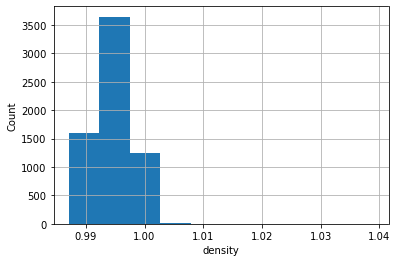

In [45]:
data_wine ['density'].hist()
plt.xlabel('density')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

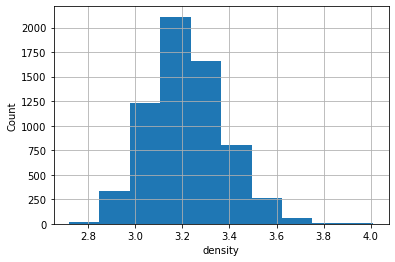

In [46]:
data_wine ['pH'].hist()
plt.xlabel('density')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

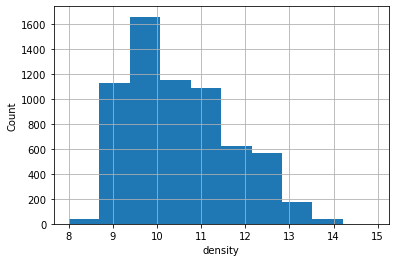

In [47]:
data_wine ['alcohol'].hist()
plt.xlabel('density')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

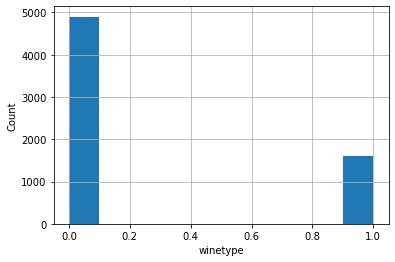

In [48]:
data_wine ['winetype'].hist()
plt.xlabel('winetype')
plt.ylabel('Count')

2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [49]:
from sklearn.linear_model import LogisticRegression
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state = 6) 


In [50]:
# KNN for classification
from sklearn.neighbors import KNeighborsClassifier

CV_score_kc = cross_val_score(KNeighborsClassifier(), X_train_wine, y_train_wine, cv=kfold).mean()

print("KNN for classification KFold CV Score :\n{}".format(CV_score_kc))


KNN for classification KFold CV Score :
0.9392451955983783


In [51]:
# Logistic Regression on wine type

CV_score_lg = cross_val_score(LogisticRegression(C=1e90, max_iter=100000), X_train_wine, y_train_wine, cv=kfold).mean()

print("Logistic Regression regression KFold CV Score :\n{}".format(CV_score_lg))


Logistic Regression regression KFold CV Score :
0.9907627020481229


In [52]:
# Penalized Logistic Regression on wine type
CV_score_plg = cross_val_score(LogisticRegression(C=100, max_iter=100000), X_train_wine, y_train_wine, cv=kfold).mean()

print("Penalized Logistic Regression regression KFold CV Score :\n{}".format(CV_score_plg))

Penalized Logistic Regression regression KFold CV Score :
0.9874785447270048


The performance of all three models are good. The best one is logistic regresson model. The second best one is Penalized Logistic Regression. Even the worst model KNN for classification achieves a score of 0.94.

In [53]:
scaler2 = preprocessing.StandardScaler()
scaler2.fit(X_train_wine)
X_train_wine_scaled = scaler2.transform(X_train_wine)
X_test_wine_scaled = scaler2.transform(X_test_wine)

In [54]:
# After scaling, KNN for classification
CV_score_kc_2 = cross_val_score(KNeighborsClassifier(), X_train_wine_scaled, y_train_wine, cv=kfold).mean()

print("After scaling, KNN for classification KFold CV Score :\n{}".format(CV_score_kc_2))


After scaling, KNN for classification KFold CV Score :
0.9919947349023325


In [55]:
# After scaling, Logistic Regression on wine type

CV_score_lg_2 = cross_val_score(LogisticRegression(C=1e90, max_iter=100000), X_train_wine_scaled, y_train_wine, cv=kfold).mean()

print("After scaling, Logistic Regression regression KFold CV Score :\n{}".format(CV_score_lg_2))


After scaling, Logistic Regression regression KFold CV Score :
0.9926105407255305


In [56]:
# After scaling, Penalized Logistic Regression on wine type
CV_score_plg_2 = cross_val_score(LogisticRegression( max_iter=100000), X_train_wine_scaled, y_train_wine, cv=kfold).mean()

print("After scaling, Penalized Logistic Regression regression KFold CV Score :\n{}".format(CV_score_plg_2))

After scaling, Penalized Logistic Regression regression KFold CV Score :
0.9917896066972041


After scaling the data with StandardScaler, the cv scores of the three model increase. It appears StandardScaler can improve the predication ability of our models. Now logistics regression is still the best one, but the second is knn for classification. The last one is penalized logistic regression.

2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

The results improve after using GridSearchCV as shown below.

In [57]:
# GridSearchCV on KNN classifier 
param_grid_knn2 = {'n_neighbors': np.arange(1, 25, 2)} 
grid_knn2 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn2)
grid_knn2.fit(X_train_wine, y_train_wine) 

print("best mean cross-validation score: {:.3f}".format(grid_knn2.best_score_))
print("best parameters: {}".format(grid_knn2.best_params_))
print("test-set score: {:.3f}".format(grid_knn2.score(X_test_wine, y_test_wine))) 


best mean cross-validation score: 0.946
best parameters: {'n_neighbors': 1}
test-set score: 0.943


In [58]:
pow1 = np.arange(0, 6)
param_grid_lg_arr = []
for i in pow1:
    param_grid_lg_arr.append(pow(10,i))
    
param_grid_lg_arr

[1, 10, 100, 1000, 10000, 100000]

In [59]:
# GridSearchCV on logistic regression 
param_grid_lg = {'C': param_grid_lg_arr} 
grid_lg = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid_lg)
grid_lg.fit(X_train_wine, y_train_wine) 

print("best mean cross-validation score: {:.3f}".format(grid_lg.best_score_))
print("best parameters: {}".format(grid_lg.best_params_))
print("test-set score: {:.3f}".format(grid_lg.score(X_test_wine, y_test_wine))) 


best mean cross-validation score: 0.989
best parameters: {'C': 100000}
test-set score: 0.990


2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random state of the split into training and test data?

Applying the two methods, the parameters for models that can be tuned do not change.


In [60]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True)

In [61]:
# GridSearchCV on KNN classifier 

grid_knn3 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn2, cv=skfold )
grid_knn3.fit(X_train_wine, y_train_wine) 

print("best mean cross-validation score: {:.3f}".format(grid_knn3.best_score_))
print("best parameters: {}".format(grid_knn3.best_params_))
print("test-set score: {:.3f}".format(grid_knn3.score(X_test_wine, y_test_wine))) 



best mean cross-validation score: 0.946
best parameters: {'n_neighbors': 1}
test-set score: 0.943


In [62]:
# GridSearchCV on logistic regression 

grid_lg3 = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid_lg, cv=skfold )
grid_lg3.fit(X_train_wine, y_train_wine) 

print("best mean cross-validation score: {:.3f}".format(grid_lg3.best_score_))
print("best parameters: {}".format(grid_lg3.best_params_))
print("test-set score: {:.3f}".format(grid_lg3.score(X_test_wine, y_test_wine)))

best mean cross-validation score: 0.989
best parameters: {'C': 100000}
test-set score: 0.990


In [63]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_wine, y_wine, random_state = 16) 

In [64]:
# GridSearchCV on KNN classifier 

grid_knn4 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn2, cv=skfold )
grid_knn4.fit(X_train_new, y_train_new) 

print("best mean cross-validation score: {:.3f}".format(grid_knn4.best_score_))
print("best parameters: {}".format(grid_knn4.best_params_))
print("test-set score: {:.3f}".format(grid_knn4.score(X_test_new, y_test_new))) 

best mean cross-validation score: 0.950
best parameters: {'n_neighbors': 1}
test-set score: 0.943


In [65]:
# GridSearchCV on logistic regression 

grid_lg4 = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid_lg, cv=skfold)
grid_lg4.fit(X_train_new, y_train_new) 

print("best mean cross-validation score: {:.3f}".format(grid_lg4.best_score_))
print("best parameters: {}".format(grid_lg4.best_params_))
print("test-set score: {:.3f}".format(grid_lg4.score(X_test_new, y_test_new)))

best mean cross-validation score: 0.992
best parameters: {'C': 100000}
test-set score: 0.991


2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

Based on the cv score, I choose the logistic regression without penalty.

Discussion:

Regularization is to prevent overfitting, it often improves the performance of the model, but not neccessarily. In this case, we can see the model without penality outperforms the models with l1 and l2 penalty. In theory, the lasso approach can do predictor selection, which is considered as useful by many. 

I also think the solver and data amount can influence the performances of the three models. 

And it depends on our definition of "the best model", cross validation score is not the only factor to consider in practice. My opinion is that models with regularization are generally better and more flexible to be used on various situation. 

My conclusion is that, in this case, based on cv score, logistic regression without penalty is the best one. But we cannot deny the usefulness of regularization.

* when writing this discussion, I read some comments on stackexchange forum.

In [66]:
X_train_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
695,6.3,0.340,0.28,14.7,0.047,49.0,198.0,0.99770,3.23,0.46,9.5,5
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4,5
3163,7.1,0.360,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
512,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6


In [67]:
lg_none = LogisticRegression(penalty = 'none',max_iter =10000)
lg_none.fit(X_train_wine, y_train_wine)
print(lg_none.coef_)
print(cross_val_score(lg_none, X_train_wine, y_train_wine, cv=kfold).mean())

[[  1.50505101  11.26047704  -0.74223307  -0.08435702  38.8667941
    0.04989719  -0.06607315 -22.11635863  10.05891699   8.49438368
   -0.31154956   0.09986897]]
0.9907627020481229


In [68]:
plg_l1 = LogisticRegression( penalty = 'l1', solver = 'liblinear', max_iter =10000)
plg_l1.fit(X_train_wine, y_train_wine)
print(plg_l1.coef_)
print(cross_val_score(plg_l1, X_train_wine, y_train_wine, cv=kfold).mean())

[[ 8.62033596e-01  1.03470353e+01  0.00000000e+00 -1.32829199e-01
   1.89926544e+01  4.79626761e-02 -6.29021184e-02 -9.08759673e+00
   4.80033855e+00  8.25491419e+00 -5.55687887e-01  5.48640417e-04]]
0.9862477754962354


In [69]:
plg_l2 = LogisticRegression(penalty = 'l2', max_iter=10000) #default C = 1.0
plg_l2.fit(X_train_wine, y_train_wine)
print(plg_l2.coef_)
print(cross_val_score(plg_l2, X_train_wine, y_train_wine, cv=kfold).mean())

[[ 1.14167107  7.78296261 -0.8976565  -0.12942108  2.83453328  0.04478283
  -0.05677304  0.1926742   5.94430923  5.65480288 -0.44893697 -0.01801836]]
0.9837839203917234


In [70]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_wine)

#family binomial 
model = sm.GLM(y_train_wine, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               winetype   No. Observations:                 4872
Model:                            GLM   Df Residuals:                     4859
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -160.70
Date:                Wed, 17 Feb 2021   Deviance:                       321.40
Time:                        12:00:57   Pearson chi2:                 2.75e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1625.5531    203.801     -7.976      0.000   -2024.995   -1226.111
fixed acidity           -0.1897      0.266     -0.712      0.476      -0.712       0.332
volatile acidity         7.0467      1.231      5.722      0.000       4.633       9.460
citric acid             -2.3938      1.369     -1.748      0.080      -5.077       0.290
residual sugar          -0.9573      0.117     -8.213      0.000      -1.186      -0.729
chlorides               23.3026      4.465      5.219      0.000      14.552      32.053
free sulfur dioxide      0.0624      0.017      3.662      0.000       0.029       0.096
total sulfur dioxide    -0.0553      0.006     -9.498      0.000      -0.067      -0.044
density               1619.3283    208.177      7.779      0.000    1211.308    2027.349
pH                      -0.2935      1.634     -0.180      0.857      -3.497       2.910
sulphates                3.5740      1.374      2.600      0.009       0.880       6.268
alcohol                  1.4418      0.297      4.861      0.000       0.861       2.023
quality                  0.4213      0.237      1.780      0.075      -0.043       0.885
========================================================================================
"""